# <b>1 Perkenalan</b>

## <b>Phase 2 - Milestones 2</b>
_Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Full Time Program Phase 2 khususnya pada Deep Learning._

_Milestones 2 ini dikerjakan oleh **Rizal Aditya-008.**_

---
## <b>Objective</b>
<br>
<img src="https://post.healthline.com/wp-content/uploads/2020/12/food-rainbow-vegetable-fruit-variety-group-healthy-1200x628-facebook-1200x628.jpg" alt="Vegetables">
<br>
<br>
<br>
<p>Sayuran adalah salah satu makanan paling umum dalam makanan sehari-hari di seluruh dunia. Orang-orang di seluruh dunia menghasilkan banyak jenis sayuran. Di planet kita terdapat hampir ratusan ribu spesies sayuran menurut beberapa survei. Dan sayuran penting bagi manusia sebagai hasil dari nutrisi, mineral, campuran fitokimia, dan kandungan serat makanannya. Ada banyak kesamaan jenis sayuran dalam hal warna, tekstur, dan bentuk.</p>

<p>Dari produksi sayuran hingga pengiriman, beberapa langkah umum dioperasikan secara manual. Seperti memetik, dan menyortir sayuran. Dan mengenali sayuran adalah tugas yang sulit bagi pelanggan di pasar, karena ada kesamaan antara sayuran yang berbeda. Karena beberapa tahap produksi sayuran hingga konsumsi masih bergantung pada operasi manual dengan sejumlah besar tenaga kerja, itu benar-benar mempengaruhi kemajuan komersialisasi barang-barang sayuran.</P> 

Untuk mengatasi masalah ini, diperlukan otomatisasi pemetikan, penyortiran, pelabelan sayuran dengan memperkenalkan pengklasifikasi gambar sayuran sehingga waktu dan uang dapat dihemat. 

Di zaman modern, di bidang pertanian, pekerjaan penelitian mendasar adalah klasifikasi dan deteksi. Karena ada berbagai jenis sayuran dan banyak orang tidak tahu tentang mereka. Jadi, rencana pengklasifikasi sayuran juga akan memudahkan kehidupan individu. Selain itu, pemilahan sayuran dilakukan secara manual di toko-toko super dan pusat-pusat distribusi.

---
## <b>Context</b>

Eksperimen awal dilakukan dengan 15 jenis sayuran umum yang ditemukan di seluruh dunia. Sayuran yang dipilih untuk percobaan adalah buncis, pare, labu botol, terung, brokoli, kubis, capsicum, wortel, kembang kol, mentimun, pepaya, kentang, labu kuning, lobak dan tomat. Sebanyak 21.000 gambar dari 15 kelas digunakan dimana setiap kelas berisi 1400 gambar berukuran 224×224 dan dalam format *.jpg. Dataset dibagi 70% untuk pelatihan, 15% untuk validasi, dan 15% untuk tujuan pengujian.

---
## <b>Content</b>
Dataset ini berisi tiga folder:

* train (15000 gambar)
* tes (3000 gambar)
* validasi (3000 gambar)
masing-masing folder di atas berisi subfolder untuk sayuran yang berbeda di mana gambar untuk masing-masing sayuran ada.

---
## <b>Data Sources</b>
Dataset ini berasal dari kaggle [Open in kaggle](https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset)

---


# 2 Import Libraries

In [101]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

# Tensorflow
import tensorflow as tf
from tensorflow import keras

# 3 Data Loading

In [102]:
# Set up Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# navigasi ke folder
% cd /content/gdrive/MyDrive/data_vegetables/data_vegetable

# cek
!pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1kMGtGb0BBn773dql2HwCLVawNR8XJD5N/data_vegetable
/content/gdrive/.shortcut-targets-by-id/1kMGtGb0BBn773dql2HwCLVawNR8XJD5N/data_vegetable


In [103]:
# Add Path File to variable
train = os.path.join("train")
validation = os.path.join("validation")
test = os.path.join("test")

# 4 Exploratory Data Analysis (EDA)

### 4.1 Mengecek Jumlah gambar di setiap folder

In [104]:
import pathlib

train_dir = pathlib.Path(train) 
val_dir = pathlib.Path(validation)
test_dir = pathlib.Path(test)
train_count = len(list(train_dir.glob('*/*.jpg')))
val_count = len(list(val_dir.glob('*/*.jpg')))
test_count = len(list(test_dir.glob('*/*.jpg')))
print(f'Jumlah gambar di dalam folder train {train_count} gambar')
print(f'Jumlah gambar di dalam folder validation {val_count} gambar')
print(f'Jumlah gambar di dalam folder test {test_count} gambar')

Jumlah gambar di dalam folder train 15000 gambar
Jumlah gambar di dalam folder validation 3008 gambar
Jumlah gambar di dalam folder test 3000 gambar


Sepertinya kita memiliki proporsi  gambar yang berbeda di setiap folder baik train, validation, dan test. Sudah dijelaskan pada sumber data nya. Bahwa proporsi gambar untuk train itu sebesar 75%, dan proporsi untuk validation itu 15% dan untuk proporsi test sebesar 15%.

### 4.2 Mengecek jumlah class setiap folder

In [105]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator()
class_train = generator.flow_from_directory(train, batch_size=4) # train folder
class_validation = generator.flow_from_directory(validation, batch_size=4) # validation folder
class_test = generator.flow_from_directory(test, batch_size=4) # test folder


Found 15000 images belonging to 15 classes.
Found 3008 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


Terlihat bahwa setiap folder baik dari folder train, validation, dan test memiliki class yang sama yaitu 15 class image.

### 4.3 Mengecek Label class

In [106]:
# dapatkan label data
data_dir = pathlib.Path('train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Bean' 'Bitter_Gourd' 'Bottle_Gourd' 'Brinjal' 'Broccoli' 'Cabbage'
 'Capsicum' 'Carrot' 'Cauliflower' 'Cucumber' 'Papaya' 'Potato' 'Pumpkin'
 'Radish' 'Tomato']


Oke, kita bisa melihat ada label class apa saja di dalam folder train. Ini berlaku untuk folder lain seperti folder test dan validation.

### 4.4 Menampilkan Gambar di setiap folder berdasarkan nama nya.

In [107]:
# membuat variable nama
names = ["Cabbage", "Cucumber",
         "Carrot", "Tomato"]
         #"Bean", "Bean",
         #"Pumpkin", "Pumkin",
         #"Potato", "Potato"]

# membuat varible path direktori
paths = ["train/Cabbage/0018.jpg", "train/Cucumber/0080.jpg",
         "train/Carrot/0032.jpg", "train/Tomato/0021.jpg"]
         #"train/Bean/0032.jpg", "train/Bean/0062.jpg",
         #"train/Pumpkin/0032.jpg", "train/Pumpkin/0062.jpg",
         #"train/Potato/0032.jpg", "train/Potato/0062.jpg"]

# membuat function membaca image dari direktori variable path
def read_images(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = image[...,::-1]
    return image

# membuat function plot gambar
def plot_images(images):
    fig = plt.figure(constrained_layout = True, figsize=(10, 10))
    gs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
    for i in range(4):
        y, x = i//2, i%2 
        ax = fig.add_subplot(gs[y,x]) 
        ax.imshow(np.uint8(images[i]))
        ax.axis("off")
        ax.title.set_text(names[i])

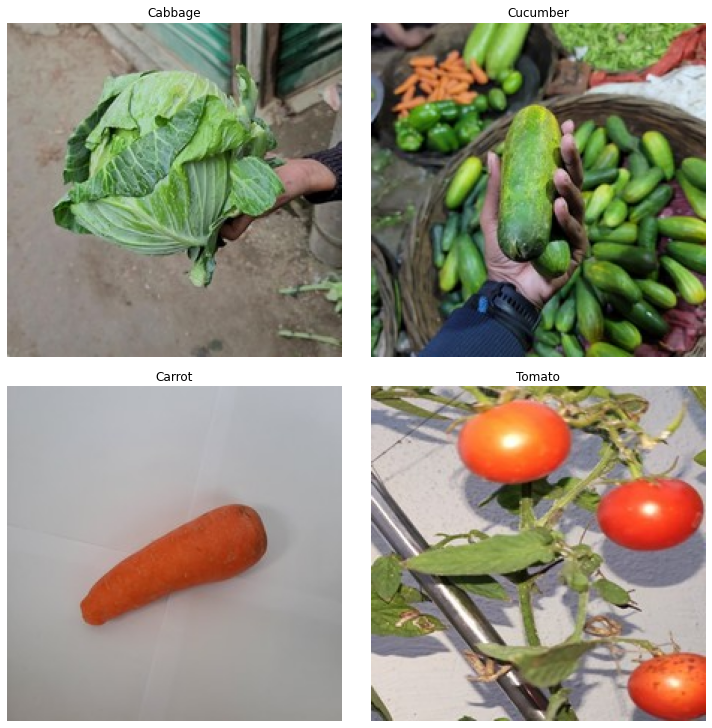

In [108]:
## PLot image in folder
images = [] # list kosong
for path in paths:
    images.append(read_images(path))
plot_images(images) # plot gambar

Dari hasil gambar diatas terlihat bahwa setiap folder sesuai dengan gambar nya. Walaupun hanya ditampilkan beberapa saja.

### 4.5 Conclusion for EDA

<b>Dari hasil melakukan eksplorasi data gambar secara singkat didapkan hasil :</b>

- Proporsi dari setiap data :    
  - Train : 15000 images
  - Validation : 3008 images
  - Test : 3000 images
-  Berdasarkan jumlah class di setiap folder :
  - Train, Validation, dan Test memiliki 15 class  
- Berdarkan label disetiap kelasnya 
  * Ada Bean, Bitter_Gourd, Bottle_Gourd, Brinjal, Broccoli, Cabbage, Capsicum, Carrot, Cauliflower, Cucumber, Papaya, Potato, Pumpkin,
 Radish, dan Tomato.
- Dan berdasarkan gambar yang ditampilkan dari nama folder sayuran terlihat bahwa nama folder dan jenis sayurannya tidak ada berbeda. Sehigga saya menyimpulkan bahwa gambar di setiap folder seusai berdasrkan namanya.

# 5 Data Preprocessing

### 5.1 Data Generator

In [109]:
!pwd

/content/gdrive/.shortcut-targets-by-id/1kMGtGb0BBn773dql2HwCLVawNR8XJD5N/data_vegetable


In [110]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(46)

# set direktori
train_dir = '/content/gdrive/MyDrive/data_vegetables/data_vegetable/train'
valid_dir ='/content/gdrive/MyDrive/data_vegetables/data_vegetable/validation'
test_dir = '/content/gdrive/MyDrive/data_vegetables/data_vegetable/test'

# deklarasi objek untuk normalization
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# set data generator Train set
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(180, 180),
                                               class_mode='categorical',
                                               seed=46)
# set data generator Test set
test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(180, 180),
                                               class_mode='categorical',
                                               seed=46)
# set data generator Validation set
valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=32,
                                               target_size=(180, 180),
                                               class_mode='categorical',
                                               seed=46)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3008 images belonging to 15 classes.


In [111]:
print(f"Number of samples : {train_data.samples}")
print(f"Number of classes : {len(train_data.class_indices)}")
print(f"Number of samples per classes : {int(train_data.samples/len(train_data.class_indices))}")

Number of samples : 15000
Number of classes : 15
Number of samples per classes : 1000


Dari informasi diatas, terlihat bahwa, setiap folder train, memiliki jumlah gambar sebanyak 15000 gambar, memiliki 15 kelas, setiap kelas masing -masing memiliki 1000 gambar.

In [112]:
# Print the class encodings done by the generators
class_map = dict([(a, b) for b, a in train_data.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


Dari hasil print diatas, terlihat bahwa kita akan melakukan encode berdasarkan abjad nama sayurannya.

# 6 Model Definition

Disini kita akan membuat model arsitektur yang sederhana saja (base model)

### 6.1 Create Base model arsitektur

In [113]:
# modelling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

num_classes = 15
# Base Model
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(180,180,3), name='Conv2D-1'),
    MaxPool2D(name='Pooling-1'),
    Conv2D(32, 3, padding='same', activation='relu', name='Conv2D-2'),
    MaxPool2D(name='Pooling-2'),
    Conv2D(64, 3, padding='same', activation='relu', name='Conv2D-3'),
    MaxPool2D(name='Pooling-3'),
    Flatten(name='Flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dense(units=num_classes, activation='softmax')
])
 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D-1 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 Pooling-1 (MaxPooling2D)    (None, 90, 90, 16)        0         
                                                                 
 Conv2D-2 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 Pooling-2 (MaxPooling2D)    (None, 45, 45, 32)        0         
                                                                 
 Conv2D-3 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 Pooling-3 (MaxPooling2D)    (None, 22, 22, 64)        0         
                                                                 
 Flatten (Flatten)           (None, 30976)            

Di dalam membuat model arsitektur **Base Model** saya menggunakan:
- Conv2D dengan input shape (180,180,3) dan menggunakan activation='relu'
- Ada 3 tahap Pooling
- Selanjutnya masuk ke tahap Flatten, dan
- Saya menggunakan hidden layer dan aktivasi menggunakna relu.

Didapatkan dari hasil arsitektur model 3,990,575 parameter yang akan di lakukan training. 

# 7 Model Training (Base Model)

### 7.1 Training Base Model 

In [114]:
# Model Training
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(train_data,
                    epochs=15,
                    validation_data = valid_data,
                    steps_per_epoch = 15000//128,
                    validation_steps = 3000//128)

Epoch 1/15
117/117 [==============================] - 16s 132ms/step - loss: 1.8687 - accuracy: 0.3902 - val_loss: 1.2179 - val_accuracy: 0.5924
Epoch 2/15
117/117 [==============================] - 15s 129ms/step - loss: 0.8864 - accuracy: 0.7158 - val_loss: 0.7387 - val_accuracy: 0.7853
Epoch 3/15
117/117 [==============================] - 15s 128ms/step - loss: 0.6552 - accuracy: 0.7935 - val_loss: 0.6536 - val_accuracy: 0.8179
Epoch 4/15
117/117 [==============================] - 15s 128ms/step - loss: 0.5050 - accuracy: 0.8454 - val_loss: 0.4392 - val_accuracy: 0.8668
Epoch 5/15
117/117 [==============================] - 15s 126ms/step - loss: 0.3440 - accuracy: 0.8964 - val_loss: 0.3993 - val_accuracy: 0.8682
Epoch 6/15
117/117 [==============================] - 15s 128ms/step - loss: 0.2996 - accuracy: 0.9116 - val_loss: 0.3417 - val_accuracy: 0.8940
Epoch 7/15
117/117 [==============================] - 15s 127ms/step - loss: 0.2734 - accuracy: 0.9180 - val_loss: 0.3433 - val_ac

Di sini kita akan melakukan training, dengan model arsitektur (base model) yang kita buat sebelumnya. 

Didalam training kita menggunkana Optimizer **Adam** dengan *learning rate* 0.001. Dan melakukan *feed forward and backpropagation* (pengulangan) sebanyak 15 **epochs**

### 7.2 Plot Hasil Training Base model

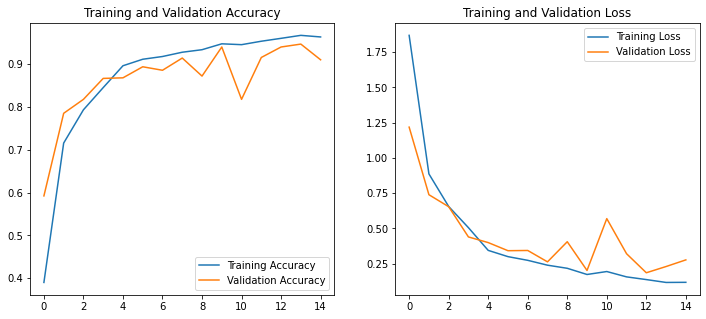

In [115]:
#Setup Epochs
epochs=15

# define variabel aaccuracy and losses
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# Create figure
plt.figure(figsize=(12, 5))

# Create Subplot For Model Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Create Subplot FOr Model Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Dari hasil Model training dengan base model, terlihat bahwa model sebenarnya cukup baik terlihat dari **Model Accuracy** yang semakin naik ketika seiring bertambahnya epochs dan **Model Loss** terlihat semakin turun seiring bertambahnya epochs, terlihat dari kedua model **accuracy** dan **loss** terlihat bahwa baik **training** dengan **validation** hampir sama, sehingga kita bisa asumsi awal bahwa model cukup baik, Terlihat juga bahwa model mengalami sedikit overfitting dan ada Spike di akir menjelang epoch berakir.


# 8 Model Improvement

Di dalam model improvement ini kita akan menambahakan augmentasi data dan menambahkan Dropout ke model Anda. 

### 8.1 Data augmentation

In [116]:
# Membuat data augemented

data_augmentation = keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal",input_shape=(180,180,3)),
    tf.keras.layers.RandomRotation(0.1), # ditambahkan rotasi pada gamabr
    tf.keras.layers.RandomZoom(0.1), # ditambahkan zoom pada gamabr
  ])

### 8.2 Add Dropout and create model arsitektur

In [117]:
# improvement model arsitektur
model2 = Sequential([data_augmentation,
                    Conv2D(16, 3, padding='same', activation='relu', input_shape=(180,180,3), name='Conv2D-1'),
                    Dropout(0.3),
                    MaxPool2D(name='Pooling-1'),
                    Conv2D(32, 3, padding='same', activation='relu', name='Conv2D-2'),
                    Dropout(0.3),
                    MaxPool2D(name='Pooling-2'),
                    Conv2D(64, 3, padding='same', activation='relu', name='Conv2D-3'),
                    Dropout(0.4),
                    MaxPool2D(name='Pooling-3'),
                    Flatten(name='Flatten'),
                    Dense(128, activation='relu', name='Dense-1'),
                    Dense(units=num_classes, activation='softmax')])

# show model arsitekture
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 Conv2D-1 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 dropout_4 (Dropout)         (None, 180, 180, 16)      0         
                                                                 
 Pooling-1 (MaxPooling2D)    (None, 90, 90, 16)        0         
                                                                 
 Conv2D-2 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 dropout_5 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 Pooling-2 (MaxPooling2D)    (None, 45, 45, 32)       

Di dalam arsitektur **Model Improvment** saya menambahkan data augmentasi dan dropout. Terilihat dari jumlah parameter yang di train tidak berbeda dengan (base model) yang kit buat sebelumnya.


### 8.3 Training Model Improvement

In [118]:
# Model Training 

model2.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

history2 = model2.fit(train_data,
                    epochs=20,
                    validation_data = valid_data,
                    steps_per_epoch = 15000//128,
                    validation_steps = 3000//128,
                    verbose=1)

Epoch 1/20
117/117 [==============================] - 16s 132ms/step - loss: 2.2829 - accuracy: 0.2682 - val_loss: 1.8784 - val_accuracy: 0.4620
Epoch 2/20
117/117 [==============================] - 15s 131ms/step - loss: 1.3431 - accuracy: 0.5585 - val_loss: 1.4330 - val_accuracy: 0.6617
Epoch 3/20
117/117 [==============================] - 15s 131ms/step - loss: 1.0038 - accuracy: 0.6701 - val_loss: 1.4239 - val_accuracy: 0.5747
Epoch 4/20
117/117 [==============================] - 15s 129ms/step - loss: 0.8447 - accuracy: 0.7163 - val_loss: 1.1084 - val_accuracy: 0.6997
Epoch 5/20
117/117 [==============================] - 15s 130ms/step - loss: 0.7571 - accuracy: 0.7417 - val_loss: 1.0867 - val_accuracy: 0.7269
Epoch 6/20
117/117 [==============================] - 15s 131ms/step - loss: 0.6407 - accuracy: 0.7938 - val_loss: 1.0184 - val_accuracy: 0.8139
Epoch 7/20
117/117 [==============================] - 15s 130ms/step - loss: 0.5320 - accuracy: 0.8312 - val_loss: 1.0496 - val_ac

Sama halnya training pada model arsitektur (base model) kita menggunakan Optimization **Adam** dengan lr.001 Dan Menggunakan Epoch 20x pengulangan.

### 8.4 Plot Hasil Training Model Improvement

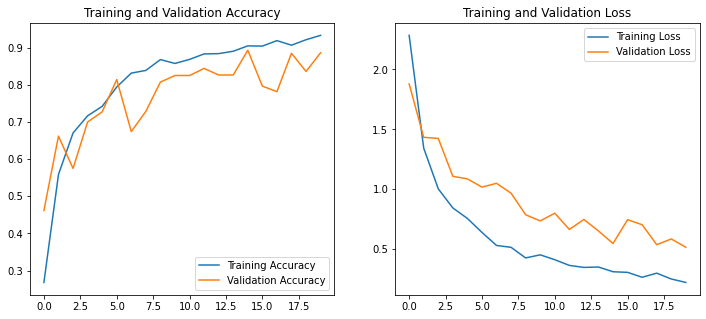

In [119]:
# set epoch
epochs=20

# Create variabel akurasi dari history training
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
# Create variable loss daru history training
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs_range = range(epochs)

# Create figure
plt.figure(figsize=(12, 5))
# Plot Model Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Model Losses
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Dari hasil plotting diatas terhadap history train pada model improvement. Tidak ada perubahan yang lebih baik dibandingkan dengan (base model).

Dari hasil diatas, terlihat dengan jelas, pada model **acuraccy** dan **losses**, pada epoch ke 3, model sudah terlihat ada tanda2 bahwa model akan crossing dan akan **overfitting**. Bisa kita simpulkan bahwa model arsitektur (Improvement) setelah kita menambahkan data augmentasi dan menambahkan Droppout, Ternyata model tidak jauh lebih baik dibandingkan dengan model arsitektur awal (base model).

Setelah saya pikir, kenapa tidak coba menggunkana model yang sudah ada seperti model **Pree Train** yaitu bisa ;
- VGG16
- InceptionV3
- ResNet50
- dan lainnya

Untuk melihat perbedaan antara model arsitektur yang kita buat dengan model yang sudah ada.

# 9 Using Pre Train Model

Setelah saya putuskan, saya akan mencoba menggunakan model arsitektur InceptionV3 dibandingkan dengan yang lain.

### 9.1 Loading the Base Model (InceptionV3)

In [120]:
# Create the base model from the pre-trained model inception_v3
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (180, 180, 3), include_top = False, weights = 'imagenet')

In [121]:
image_batch, label_batch = next(iter(train_data))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 4, 4, 2048)


Ekstraktor fitur ini mengubah setiap gambar berukuran 180x180x3 menjadi blok fitur berukuran 4x4x2048. Mari kita lihat apa yang dilakukannya pada kumpulan contoh gambar.

In [122]:
# Freeze the convolutional base
base_model.trainable = False

 Pembekuan (dengan menyetel layer.trainable = False) mencegah pembobotan pada layer tertentu agar tidak diperbarui selama pelatihan.

In [123]:
## Create model arsitektur Funtional API
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

# Add a final softmax layer with 15 node for classification output
x = tf.keras.layers.Dense(15, activation='softmax')(x)

model3 = tf.keras.models.Model(base_model.input, x)

# Let's take a look at the base model architecture
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 89, 89, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 89, 89, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

### 9.2 Training Model (InceptionV3)

In [124]:
from tensorflow.keras.optimizers import RMSprop

# add compile model
model3.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# add to history
inc_history = model3.fit_generator(train_data, 
                                       validation_data = valid_data, 
                                       steps_per_epoch = 100, 
                                       epochs = 10)

Epoch 1/10
100/100 [==============================] - 28s 236ms/step - loss: 1.9263 - accuracy: 0.7916 - val_loss: 0.5378 - val_accuracy: 0.9046
Epoch 2/10
100/100 [==============================] - 22s 220ms/step - loss: 0.3930 - accuracy: 0.9217 - val_loss: 0.5358 - val_accuracy: 0.9013
Epoch 3/10
100/100 [==============================] - 22s 221ms/step - loss: 0.2842 - accuracy: 0.9459 - val_loss: 0.5757 - val_accuracy: 0.9176
Epoch 4/10
100/100 [==============================] - 22s 222ms/step - loss: 0.2191 - accuracy: 0.9603 - val_loss: 0.1056 - val_accuracy: 0.9824
Epoch 5/10
100/100 [==============================] - 22s 220ms/step - loss: 0.2318 - accuracy: 0.9655 - val_loss: 0.3002 - val_accuracy: 0.9571
Epoch 6/10
100/100 [==============================] - 22s 220ms/step - loss: 0.1850 - accuracy: 0.9728 - val_loss: 0.1264 - val_accuracy: 0.9791
Epoch 7/10
100/100 [==============================] - 22s 220ms/step - loss: 0.2015 - accuracy: 0.9691 - val_loss: 0.0806 - val_ac

Di dalam melakukan training model arsitektur InceptionV3 saya menggunkan optimizer **RMSprop** dengan lr.001 dengan menggunakan pengulangan sebnayak 10 epochs.

### 9.3 Plot Hasil Training Model (InceptionV3)

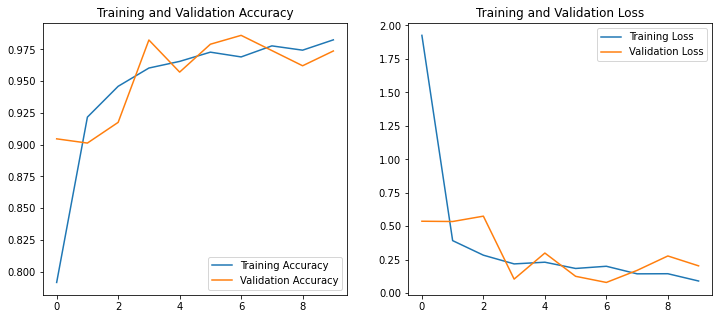

In [125]:
#Setup Epochs
epochs=10

# define variabel aaccuracy and losses
acc = inc_history.history['accuracy']
val_acc = inc_history.history['val_accuracy']
loss = inc_history.history['loss']
val_loss = inc_history.history['val_loss']

epochs_range = range(epochs)

# Create figure
plt.figure(figsize=(12, 5))

# Create Subplot For Model Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Create Subplot FOr Model Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Dari hasil traing selanjutnya kita plotting, 

Dari hasil plotting diatas, terlihat bahwa, model mengalami beberapa kali spike, tetapi kalau epochs nya ditambahkan mungkin model terlihat lebih stabil dan terilihat juga bahwa model yang kita gunkaan ini, jauh lebih baik dibandingkan dengan model arsitektur (base model) yang kita buat sebelumnya.

Dilihat dari perbedaan nilai **Accuracy** dan **losses** nya. Untuk model InceptionV3 ini bisa saya katakan overkill dengan data yang saya gunakan sekarang. hehe


# 10 Model Evaluation

Selanjutnya saya akan mengevaluasi model yang sudah kita training sebelumnya


In [126]:
# Create List
accuracy_model = []
loss_model = []

### 10.1 Base Model

In [127]:
loss, accuracy = model.evaluate(test_data)
print('Test accuracy :', accuracy)
accuracy_model.append(accuracy)
loss_model.append(loss)

94/94 [==============================] - 9s 99ms/step - loss: 0.3143 - accuracy: 0.9087
Test accuracy : 0.9086666703224182


### 10.2 Base Model - Fine Tuning (Improvement)

In [128]:
loss2, accuracy2 = model2.evaluate(test_data)
print('Test accuracy :', accuracy2)
accuracy_model.append(accuracy2)
loss_model.append(loss2)

94/94 [==============================] - 9s 100ms/step - loss: 0.5012 - accuracy: 0.8933
Test accuracy : 0.8933333158493042


### 10.3 Model Pree Train (InceptionV3)

In [129]:
loss3, accuracy3 = model3.evaluate(test_data)
print('Test accuracy :', accuracy3)
accuracy_model.append(accuracy3)
loss_model.append(loss3)

94/94 [==============================] - 11s 112ms/step - loss: 0.1596 - accuracy: 0.9767
Test accuracy : 0.9766666889190674


### 10.4 Model Comparison

In [130]:
import pandas as pd
# comparison algorithm
model_comp = pd.DataFrame({'Model': ['Base Model ', 'Model Improvement (Base Model)', 'Model Pree Train (InceptionV3)'],
                          'Loss score' : loss_model,
                          'Accuracy score': accuracy_model,})

# Menampilkan dan melakukan shorting berdasarkan F1 Score
model_comp.sort_values(by='Loss score', ascending=True)

,Model,Loss score,Accuracy score
2,Model Pree Train (InceptionV3),0.159649,0.976667
0,Base Model,0.314302,0.908667
1,Model Improvement (Base Model),0.501220,0.893333


Darri hasil ketiga model, terlihat bahwa model **InceptionV3** memiliki peforma yang lebih baik diabandingkan dengan model arsitektur yang kita buat sendiri. Dengan loss yang sangat minimal, dan akurasi yang paling tinggi. Dan dilihat juga bahwa model sebenarnya baik (tidak overfitting melainkan goodfit). 

Sehingga saya memutuskan akan melakukan save terhadap model yang memiliki peforma yang sangat baik untuk dilakukan deployment.

# 11 Model Saving

In [131]:
# Check firts to see if file exist already
# If not, the model is saved to disk
import os.path
if os.path.isfile('models/model_base_InceptionV3.h5') is False:
  model3.save('models/model_base_InceptionV3.h5')

# 12 Model Inference

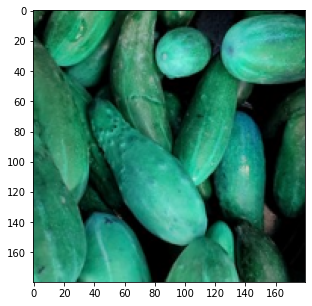


Predicted Label : Cucumber
 Actual Label : Cucumber


In [132]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image

# Path image
image_path = 'test/Cucumber/1003.jpg'

def create_predictions(image_path, actual_label): 
    
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img_resize = cv2.resize(img,(180,180))
    img_type = img_resize.astype('float32')
    img_scale = img_type/255
    img_input = np.expand_dims(img_scale,axis=0)

    # Predictions
    predicted_label = np.argmax(model3.predict(img_input)) # predic use model InceptionV3
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(5, 5))
    plt.imshow(img_scale)
    plt.show()
    print('')
    print(f'Predicted Label : {predicted_vegetable}\n Actual Label : {actual_label}')

# Classify Image
create_predictions(image_path, actual_label= 'Cucumber')

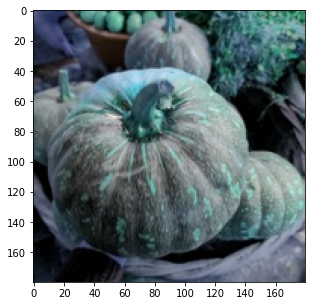


Predicted Label : Pumpkin
 Actual Label : Pumpkin


In [133]:
# Classify Image
path = '/content/gdrive/MyDrive/data_vegetables/data_vegetable/test/Pumpkin/1022.jpg'
create_predictions(path, actual_label= 'Pumpkin')

Dari hasil inference diatas terlihat bahwa, model mampu melakukan classifikasi gambar dengan benar. Sehingga saya rasa model sangat baik.

# 13 Pengambilan Kesimpulan

### EDA Analysis

Dalam melakukan EDA secara singkat, kita bisa melihat bahwa :
- Proporsi dari setiap data :    
  - Train : 15000 images
  - Validation : 3008 images
  - Test : 3000 images
-  Berdasarkan jumlah class di setiap folder :
  - Train, Validation, dan Test memiliki 15 class  
- Berdarkan label disetiap kelasnya 
  * Ada Bean, Bitter_Gourd, Bottle_Gourd, Brinjal, Broccoli, Cabbage, Capsicum, Carrot, Cauliflower, Cucumber, Papaya, Potato, Pumpkin,
 Radish, dan Tomato.
- Dan berdasarkan gambar yang ditampilkan dari nama folder sayuran terlihat bahwa nama folder dan jenis sayurannya tidak ada berbeda. Sehigga saya menyimpulkan bahwa gambar di setiap folder seusai berdasrkan namanya.

### Model Analysis

Dari hasil modeling yang kita lakukan sebelumnya baik membuat model arsitektur dan melakukan improvment terhadap modelnya, dan mencoba untuk membandingkan model arsitektur yang kita buat dengan model pree train **InceptionV3**, didapatkan kesimpulan :
* Model arsitektur yang kita buat memiliki peforma yang sebenarnya cukup baik dalam **Accuracy** dan **Loss**, tetapi ada sedikit overfitting disana. Sehingga saya memutuskan untuk melakukan improvement.
* Dari hasil model improvement yang saya lakukan, yaitu dengan menambahkan data augmentasi dan dropout. Ternya model tidak ada menunjukan peforma yang meningkat, melainkan menurun dalam sisi **Accuraacy** dan meningkatnya nilai **Loss**, model juga terlihat sangat overfitting dibandingkan dengan (Base model) yang kita train sebelumnya.
* Setelah kita melakukan percobaan improvement model, saya memutuskan untuk mencoba model pree train, yaitu model **InceptionV3**
* Dari hasil training menggunkana model tersebut, ternya modelnya overkill, dan memiliki peforma yang sangat baik dibandingkan model yang kita buat sebelumnya.
* Saya akan menampikan hasil test dari 3 model tersebut :

| Model | Loss | Accuracy |
  | --- | --- | --- |
  | InceptionV3 | 0.159649 | 0.976667 |
  | Base Model | 0.314302 | 0.908667 |
  | Improvement (base model) | 0.501220 | 0.893333 |

Dari tabel diatas, terlihat bahwa model yang memiliki peforma sangat baik adalah **InceptionV3** dibandingkan dengan model arsitektur yang kita bangun sendiri.

Sehingga saya memutuskan untuk melakukan deployment terhadap model yang memiliki peforma yang sangat baik hal ini adalah **InceptionV3**

Setelah dilakukan pemilihan model yang mana yang ingin digunakan. Selanjutnya model akan dilakukan uji coba untuk melakukan inference, terlihat bahwa model dapat memprediksi dengan sangat baik.

